# Nasa Asteroids Classification

## Information on Asteroids collected from NASA API

![Asteroid Image](images/asteroids.jpg)

Explain data set

### Dependencies

```python
# Jupyter notebook
pip install notebook
# NumPy
pip install numpy
# SciPy
pip install scipy
# Pandas
pip install pandas
# Scikit-Learn
pip install scikit-learn
# Matplotlib
pip install matplotlib
# Seaborn
pip install seaborn
# imblearn
pip install imblearn
# xgboost
pip install xgboost
# catboost
pip install catboost
```

## Data Analysis and Preprocessing

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

### Create DataFrame from the Nasa CSV file

In [2]:
# DataFrame Pandas Settings
# pd.set_option('display.max_columns', None)

df = pd.read_csv("data/nasa.csv")

df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Pre-processing

#### Check if there are NA values

In [3]:
df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

#### Check if there are duplicates

In [4]:
df.duplicated().sum()


0

#### Check if there is constant columns

In [5]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(constant_columns)

['Orbiting Body', 'Equinox']


### Drop Unnecessary Columns

There is no need for the ID and name of the asteroids.

In [6]:
new_df = df.drop(columns=['Neo Reference ID',
                          'Name',
                          'Est Dia in KM(min)',
                          'Est Dia in KM(max)',
                          'Est Dia in Miles(min)',
                          'Est Dia in Miles(max)',
                          'Est Dia in Feet(min)',
                          'Est Dia in Feet(max)',
                          'Relative Velocity km per hr',
                          'Miles per hour',
                          'Miss Dist.(Astronomical)',
                          'Miss Dist.(lunar)',
                          'Miss Dist.(miles)',
                          'Orbiting Body',
                          'Orbit ID',
                          'Equinox'
                          ])
new_df.to_csv('data/new_csv.csv', index=False)
new_df.head()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,127.219879,284.472297,1995-01-01,788947200000,6.115834,62753692.0,2017-04-06 08:36:37,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,146.067964,326.617897,1995-01-01,788947200000,18.113985,57298148.0,2017-04-06 08:32:49,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,231.502122,517.654482,1995-01-08,789552000000,7.590711,7622911.5,2017-04-06 09:20:19,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,8.801465,19.680675,1995-01-15,790156800000,11.173874,42683616.0,2017-04-06 09:15:49,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,127.219879,284.472297,1995-01-15,790156800000,9.840831,61010824.0,2017-04-06 08:57:58,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


### Encode Column types

As you can see below, there are 2 columns that have the type object, which makes it unable to be processed in data analysis, that are `Close Approach Date` and `Orbit Determination Date`. Additionally we have the column `Hazardous`, which has boolean type.

In [7]:
print(new_df.dtypes)

Absolute Magnitude              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Miss Dist.(kilometers)          float64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Eccentricity                    float64
Semi Major Axis                 float64
Inclination                     float64
Asc Node Longitude              float64
Orbital Period                  float64
Perihelion Distance             float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
Hazardous                          bool
dtype: object


We convert them to miliseconds given https://www.epochconverter.com/ calculations. Also we convert True -> 1 and False -> 0

In [8]:
new_df['Close Approach Date'] = pd.to_datetime(new_df['Close Approach Date'])
new_df['Close Approach Date'] = (new_df['Close Approach Date'].astype('int64'))

new_df['Orbit Determination Date'] = pd.to_datetime(new_df['Orbit Determination Date'])

new_df['Hazardous'] = new_df['Hazardous'].astype('int')


new_df.to_csv('data/new_csv.csv', index=False)
new_df.head()


,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,127.219879,284.472297,788918400000000000,788947200000,6.115834,62753692.0,2017-04-06 08:36:37,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,146.067964,326.617897,788918400000000000,788947200000,18.113985,57298148.0,2017-04-06 08:32:49,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,231.502122,517.654482,789523200000000000,789552000000,7.590711,7622911.5,2017-04-06 09:20:19,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,8.801465,19.680675,790128000000000000,790156800000,11.173874,42683616.0,2017-04-06 09:15:49,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,127.219879,284.472297,790128000000000000,790156800000,9.840831,61010824.0,2017-04-06 08:57:58,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [9]:
print(new_df.dtypes)

Absolute Magnitude                     float64
Est Dia in M(min)                      float64
Est Dia in M(max)                      float64
Close Approach Date                      int64
Epoch Date Close Approach                int64
Relative Velocity km per sec           float64
Miss Dist.(kilometers)                 float64
Orbit Determination Date        datetime64[ns]
Orbit Uncertainity                       int64
Minimum Orbit Intersection             float64
Jupiter Tisserand Invariant            float64
Epoch Osculation                       float64
Eccentricity                           float64
Semi Major Axis                        float64
Inclination                            float64
Asc Node Longitude                     float64
Orbital Period                         float64
Perihelion Distance                    float64
Perihelion Arg                         float64
Aphelion Dist                          float64
Perihelion Time                        float64
Mean Anomaly 

### Check for Outliers

Values that are far away from the vast majority of the values

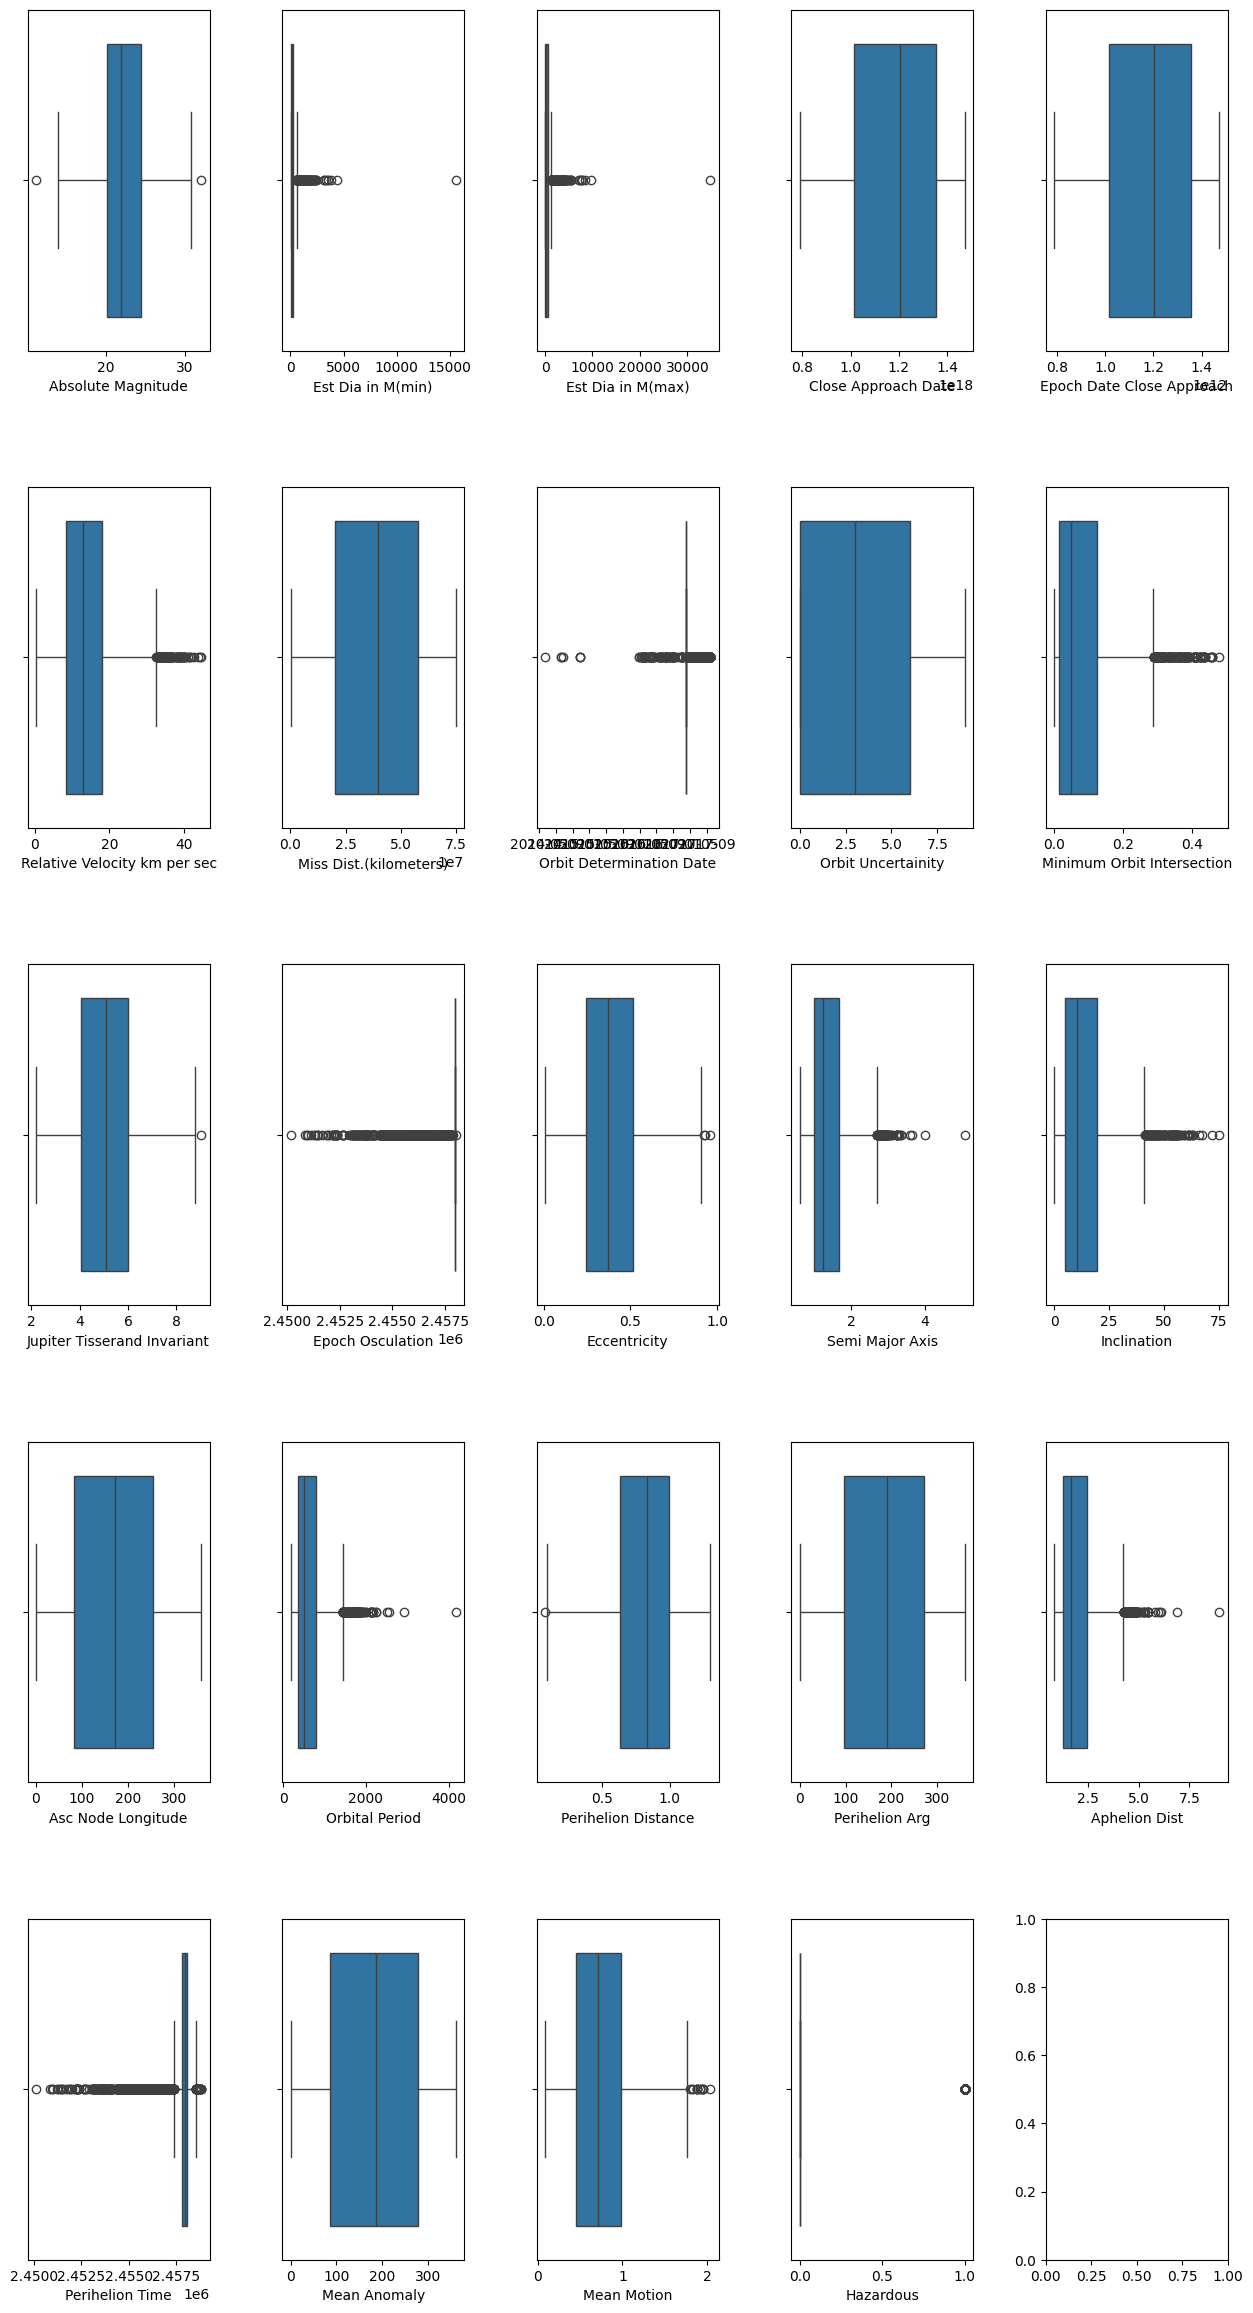

In [10]:
num_plots = len(new_df.columns)
num_cols = 5
num_rows = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

for ind, col in enumerate(new_df.columns):
    i = ind // num_cols
    j = ind % num_cols
    sb.boxplot(x=new_df[col], orient='h', ax=axs[i, j])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Although there are outliers, these values, given their meaning, we cannot conclude that they are errors, but rather, normal values.


## Data Analysis

We can begin to analyze the data.

In [11]:
new_df.describe()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4.687000e+03,4687,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,204.604203,457.508906,1.179854e+18,1.179881e+12,13.970811,3.841347e+07,2017-04-16 09:54:40.266908672,3.516962,0.082320,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
min,11.160000,1.010543,2.259644,7.889184e+17,7.889472e+11,0.335504,2.660989e+04,2014-06-13 15:20:44,0.000000,0.000002,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,33.462237,74.823838,1.015546e+18,1.015574e+12,8.432865,1.995928e+07,2017-04-06 08:42:07.500000,0.000000,0.014585,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,110.803882,247.765013,1.203034e+18,1.203062e+12,12.917889,3.964771e+07,2017-04-06 09:03:02,3.000000,0.047365,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,253.837029,567.596853,1.355530e+18,1.355558e+12,18.077649,5.746863e+07,2017-04-06 09:22:13,6.000000,0.123593,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15579.552413,34836.938254,1.473293e+18,1.473318e+12,44.633747,7.478160e+07,2017-09-28 06:49:30,9.000000,0.477891,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000
std,2.890972,369.573402,826.391249,1.981540e+17,1.981540e+11,7.293223,2.181110e+07,NaN,3.078307,0.090300,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647


There are table that not being redundant or completly useless vary very little and do not influence the results that much like the table `Orbit determination Date` witch the most current date is from 2017 and the older date is from 2016 wich only varies one year given that the timelines we are working is decades for the comet to come this variation is meaningles.

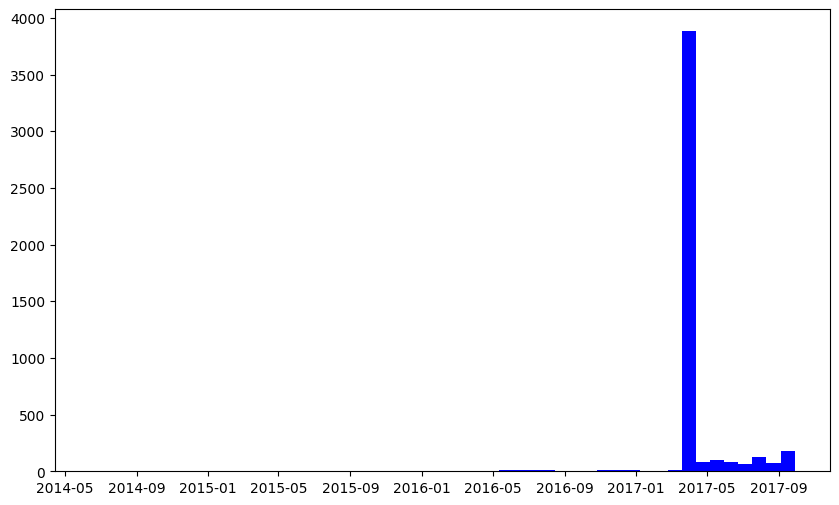

In [12]:

plt.figure(figsize=(10, 6))
plt.hist(new_df['Orbit Determination Date'], bins=50, color='blue')
print("")

Given that most of the data is from 2017 and the max variation is from 2014 we came to the conclusion that the column 'Orbit Determination Date' should probably be dropped

In [13]:
new_df.drop(columns=['Orbit Determination Date'], inplace=True)
new_df.to_csv('data/new_csv.csv', index=False)

0 Absolute Magnitude
1 Est Dia in M(min)
2 Est Dia in M(max)
3 Close Approach Date
4 Epoch Date Close Approach
5 Relative Velocity km per sec
6 Miss Dist.(kilometers)
7 Orbit Uncertainity
8 Minimum Orbit Intersection
9 Jupiter Tisserand Invariant
10 Epoch Osculation
11 Eccentricity
12 Semi Major Axis
13 Inclination
14 Asc Node Longitude
15 Orbital Period
16 Perihelion Distance
17 Perihelion Arg
18 Aphelion Dist
19 Perihelion Time
20 Mean Anomaly
21 Mean Motion


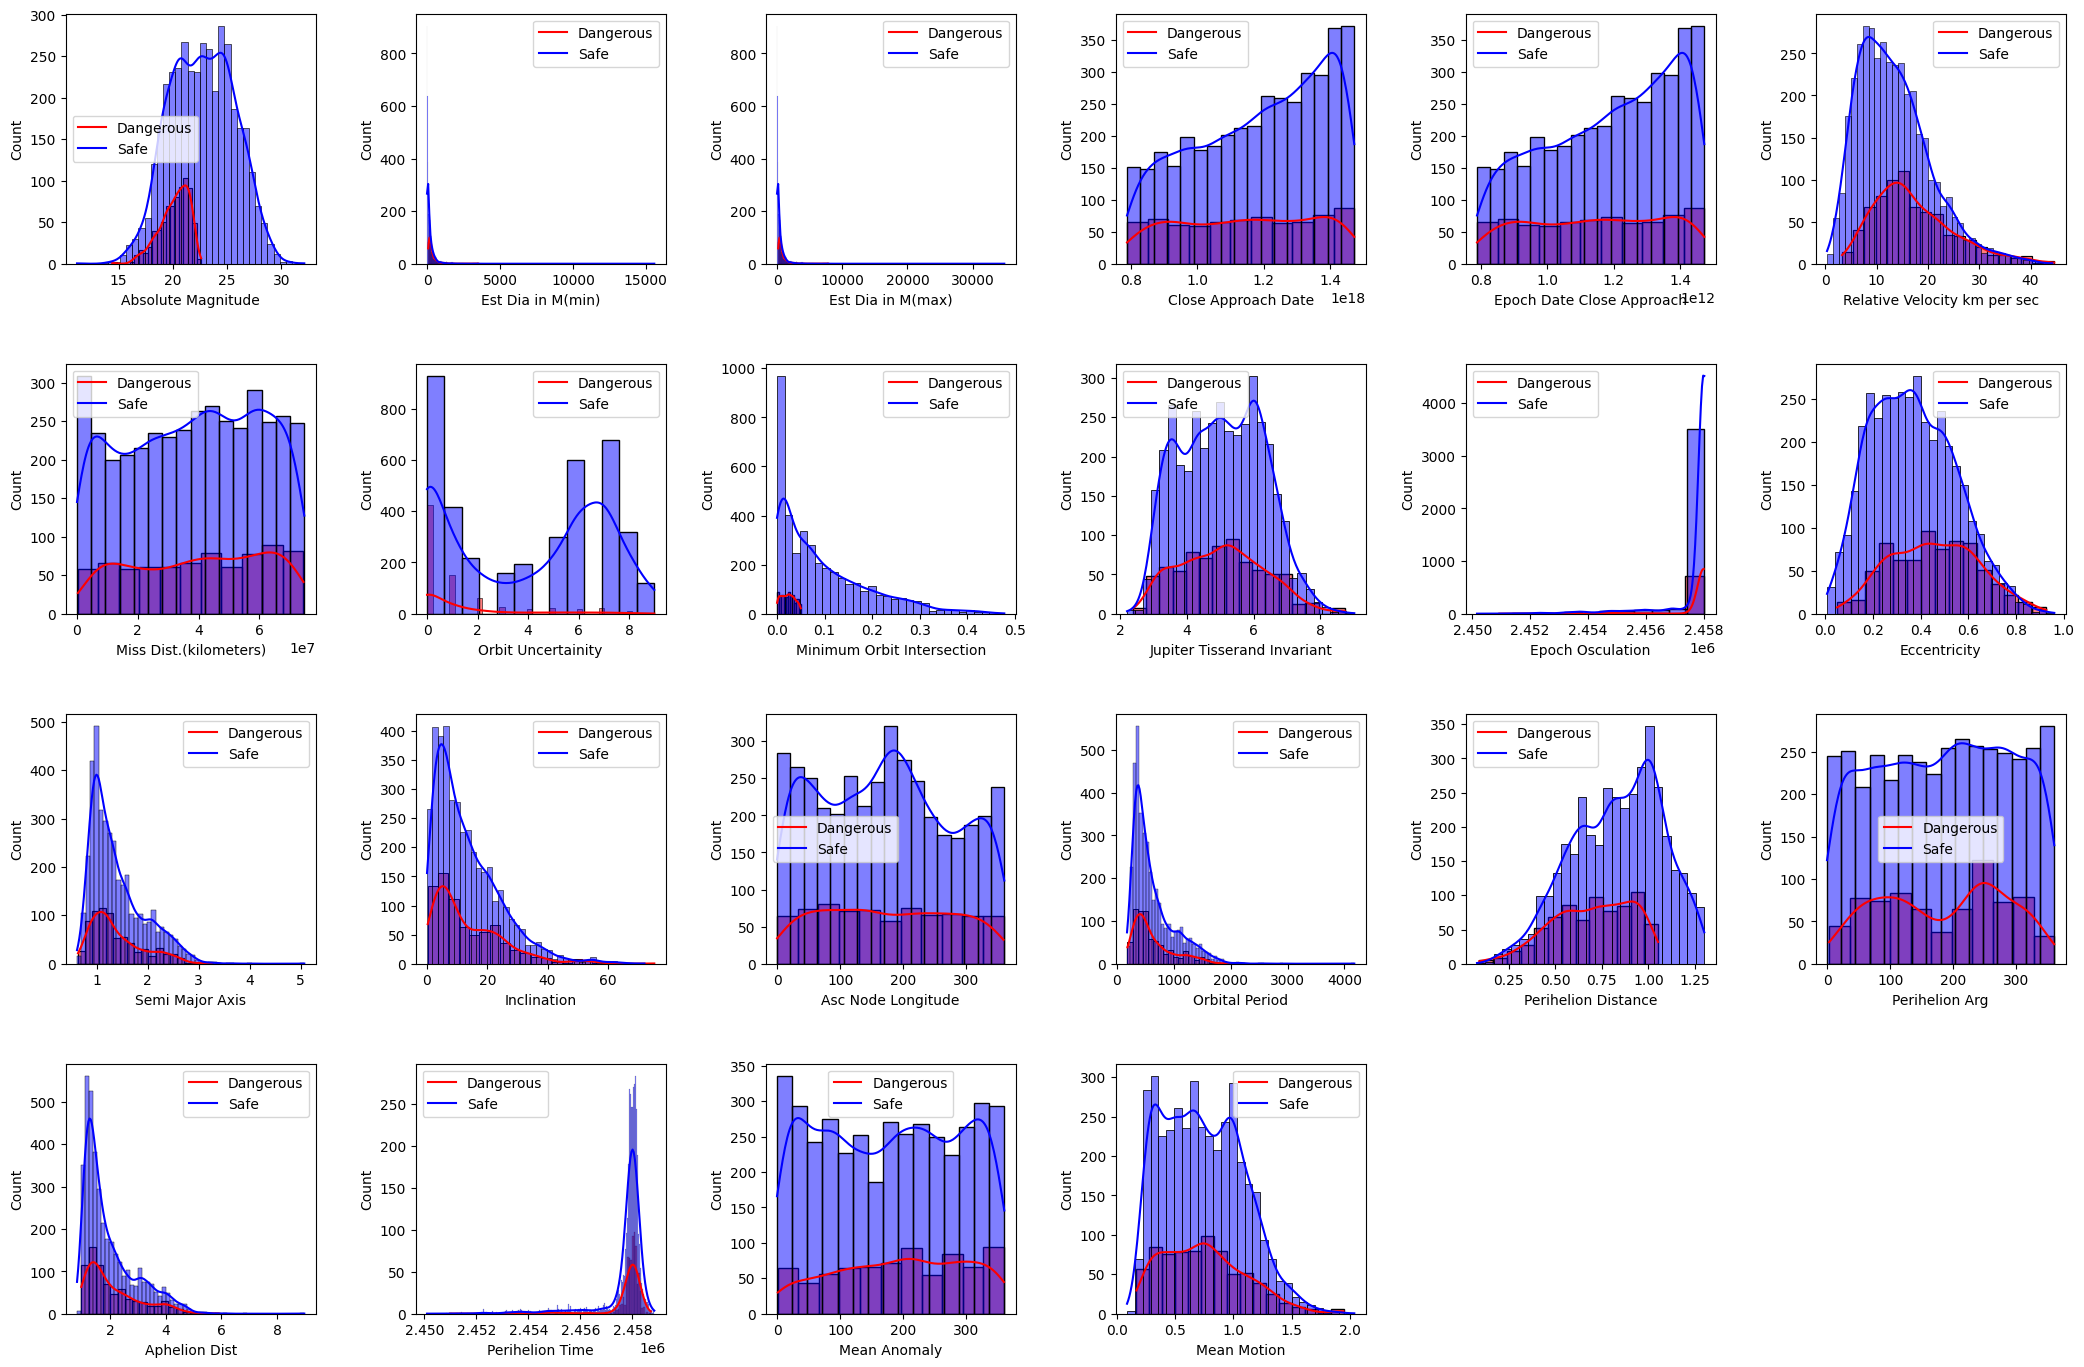

In [14]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)


df1 = new_df[new_df['Hazardous']==1].drop(['Hazardous'],axis=1)
df2 = new_df[new_df['Hazardous']==0].drop(['Hazardous'],axis=1)
cols = df2.columns
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(6,6,i+1)
    sb.histplot(data=df1[col], color='red', label = 'Dangerous', kde=True)
    sb.histplot(data=df2[col], color='blue', label = 'Safe', kde=True)
    _,axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes,prop={'size': 10})
plt.show()


<Axes: xlabel='Hazardous', ylabel='count'>

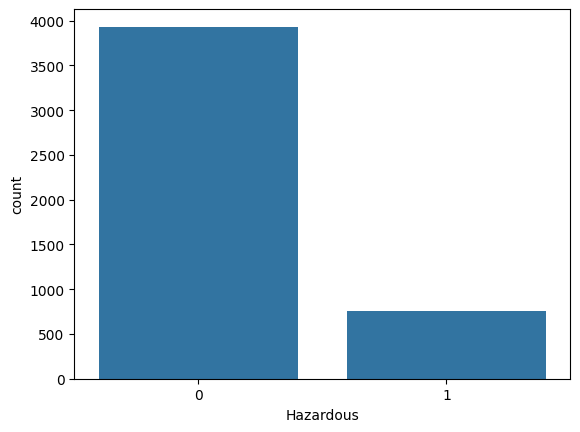

In [15]:
sb.countplot(x=new_df['Hazardous'])

Analysing the graph above, we can conclude that there are more Non-Hazardous Asteroids than Hazardous. Although irrevelant and more of a curiosity, it's important and can determine the best approaches and models choices.

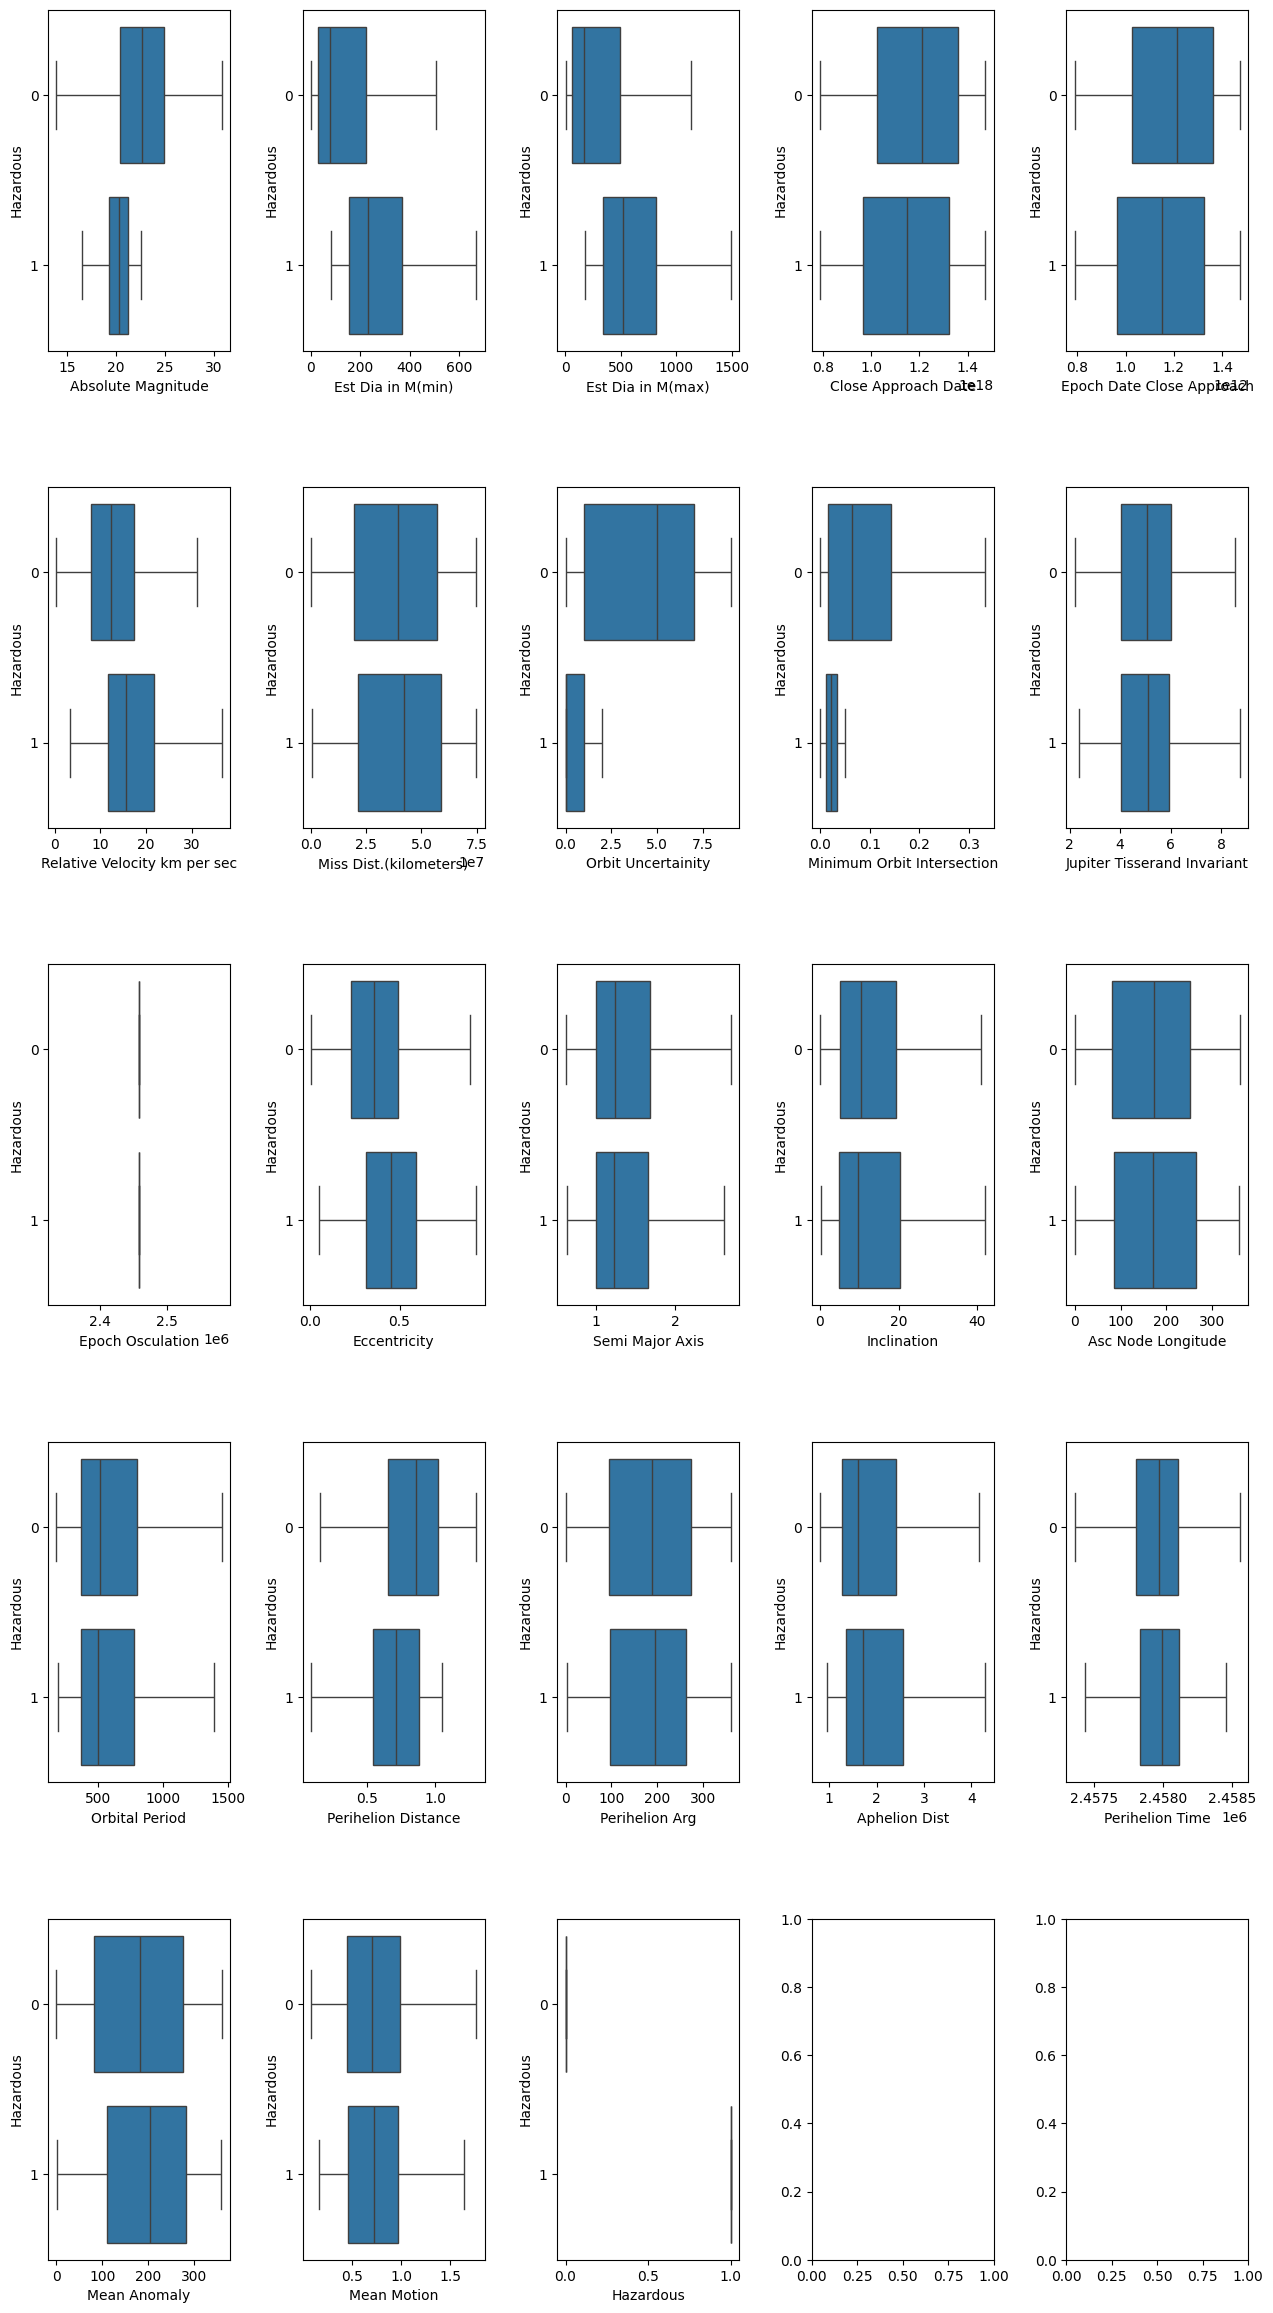

In [16]:
num_plots = len(new_df.columns)
num_cols = 5
num_rows = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

for ind, col in enumerate(new_df.columns):
    i = ind // num_cols
    j = ind % num_cols
    sb.boxplot(x=new_df[col], y=new_df['Hazardous'], orient='h',showfliers=False ,ax=axs[i, j])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

From these graphs, we can conclude the following:
- The averages of Absolute Magnitude, Approach Date, Orbit Uncertainity, Minimum Orbit Intersection, Perihelion Distance of Hazardous asteroids are lower than the Non-Hazardous ones.
- The averages of Est Dia in M(min), Est Dia in M(max), Relative Velocity km per sec, Miss Dist(kilometers), Orbit Determination Date, Eccentricity of Hazardous asteroids are higher than the Non-Hazardous ones.
- Other non-refered columns have no significant differences between the Hazardous and Non-Hazardous.

# Feature Extraction 

The objetive from this is to see if there is correlations between the features themselfs. That way, we can reduce the size of the table, without changing the output and making the training faster.

<Axes: >

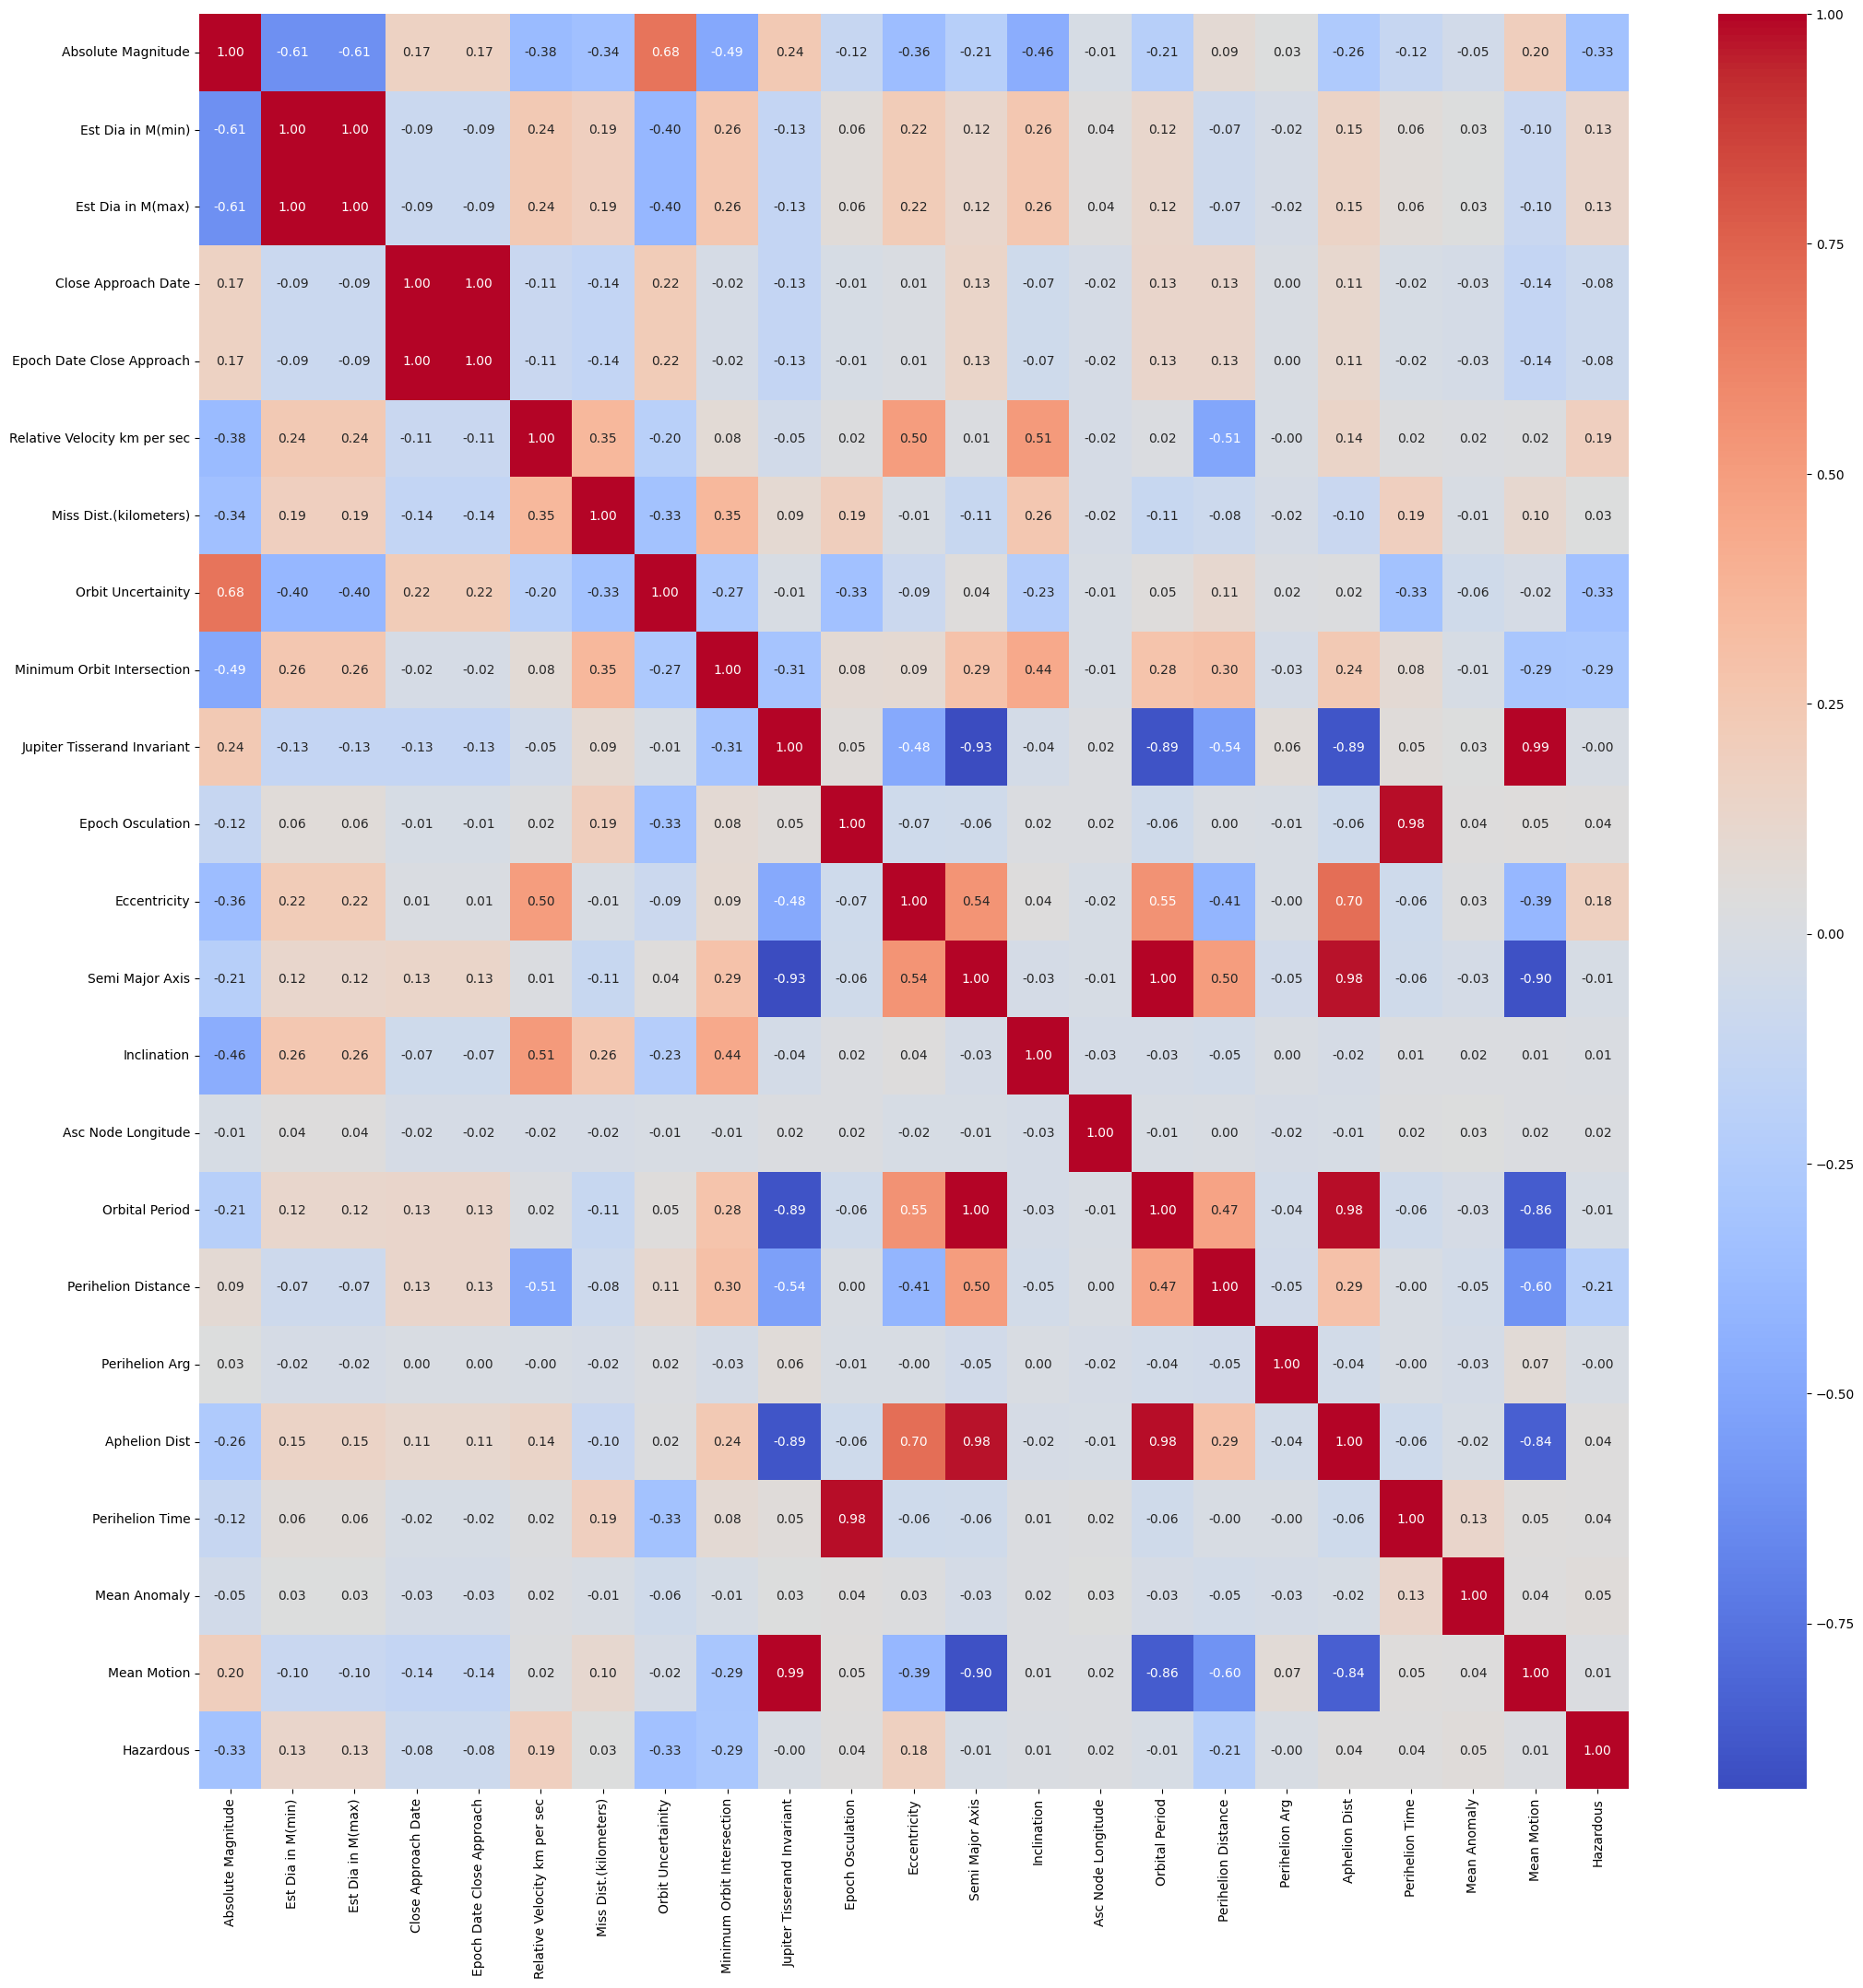

In [17]:
correlation = new_df.corr()

f, ax = plt.subplots(figsize=(25, 25))

sb.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)

From the correlation table, we can see that the vast majority of correlations are close to 0 (no correlation at all), given some exceptions:
- When the feature correlates with itself, making it alwasys 1 (diagonal line)
- Some features do have correlation, but we noticed that there is a correlation 1.0 between some of differents features, making us think that the features hold the same information , for example the 'Close Approach Date' and 'Epoch Close Approach Date'.

Given the before mentioned exceptions, now we want to do another graph, but that only shows the features that have correlation > 0.95, for simplicity.

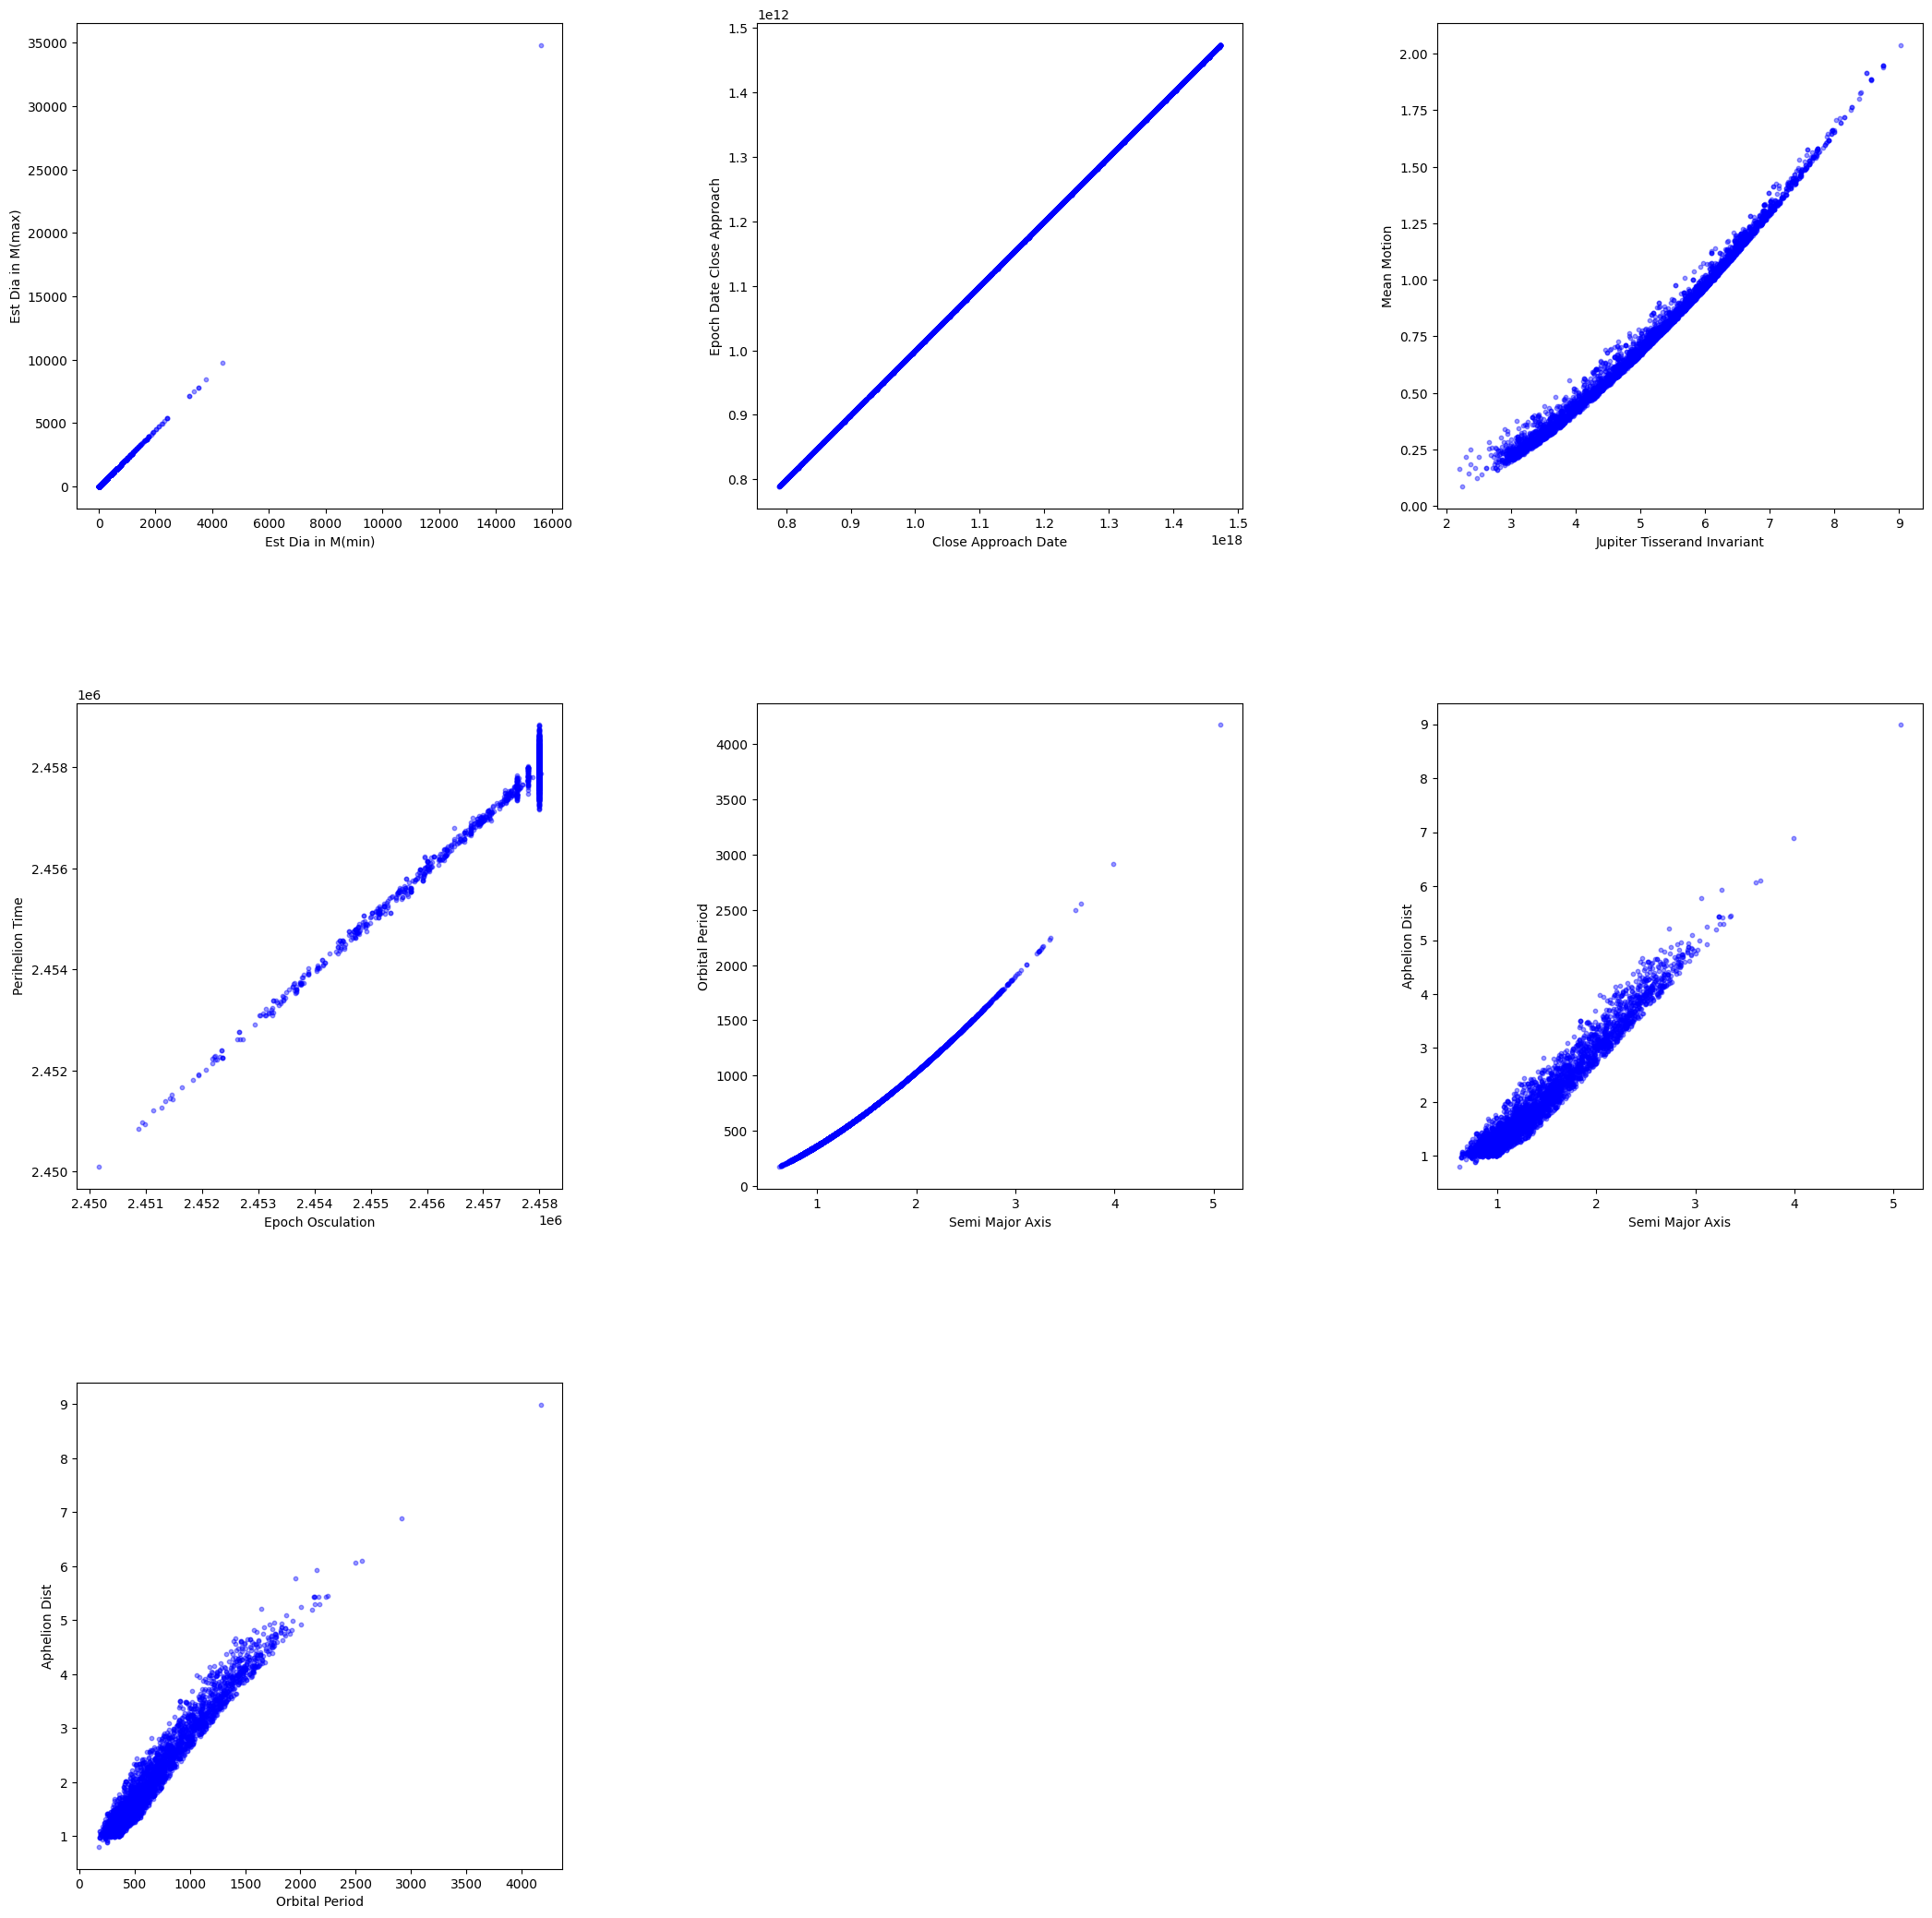

In [18]:
columns = list(new_df.columns)

plot = []

for i, x in enumerate(columns):
    if x == 'Hazardous':
        continue
    for y in columns[i::]:
        if x == y or y == 'Hazardous':
            continue
        if math.fabs(new_df[x].corr(new_df[y])) > 0.95:
            plot.append((x, y))

plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, columnss in enumerate(plot):
    plt.subplot(3,3,i+1)
    plt.scatter(new_df[columnss[0]],new_df[columnss[1]],s=10,c='blue',alpha=0.4)
    plt.xlabel(columnss[0])
    plt.ylabel(columnss[1])

We can conlude that the features that have correlation > 0.95 are:
- Est Dia in M(min) and Est Dia in M(max) 
- Close Approach Date and  Epoch Date Close Approach 
- Jupiter Tisserand Invariant and Mean Motion
- Epoch Osculation and Perihelion Time
- Semi Major Axis and Orbital Period
- Semi Major Axis and Aphelion Dist
- Orbital Period and Aphelion Dist

Given that the features hold the same information, we can drop or joint them to make the table smaller and the training faster.

In [19]:
new_df = pd.read_csv('data/new_csv.csv')

new_df.drop(columns=['Close Approach Date'], inplace=True) ##corr 1, so just simply drop it

new_df['Est Dia in M(avg)'] = (new_df['Est Dia in M(min)'] + new_df['Est Dia in M(max)']) / 2 ##There was a 2.23 ratio between the max and min values. Corr = 1

new_df['Jupiter Tisserand Invariant and Mean Motion'] = new_df['Jupiter Tisserand Invariant'] / new_df['Mean Motion'] ##Correlation = 0.99, so we calculate the ratio´

new_df['Epoch Osculation and Perihelion Time'] = new_df['Epoch Osculation'] / new_df['Perihelion Time'] ##Correlation = 0.98, so we calculate the ratio

new_df['Semi Major Axis and Orbital Period'] = new_df['Semi Major Axis'] / new_df['Orbital Period'] ##Correlation = 1

new_df['Semi Major Axis and Aphelion Dist'] = new_df['Semi Major Axis'] / new_df['Aphelion Dist'] ##Correlation = 0.98

new_df['Orbital Period and Aphelion Dist'] = new_df['Orbital Period'] / new_df['Aphelion Dist'] ##Correlation = 0.98

new_df.drop(columns=['Est Dia in M(min)', 'Est Dia in M(max)','Jupiter Tisserand Invariant', 'Mean Motion','Epoch Osculation','Perihelion Time','Semi Major Axis', 'Orbital Period', 'Aphelion Dist'], inplace=True)

new_df.to_csv('data/new_csv.csv', index=False)

new_df.head()

,Absolute Magnitude,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Mean Anomaly,Hazardous,Est Dia in M(avg),Jupiter Tisserand Invariant and Mean Motion,Epoch Osculation and Perihelion Time,Semi Major Axis and Orbital Period,Semi Major Axis and Aphelion Dist,Orbital Period and Aphelion Dist
0,21.6,788947200000,6.115834,62753692.0,5,0.025282,0.425549,6.025981,314.373913,0.808259,57.257470,264.837533,1,205.846088,7.846904,0.999934,0.002308,0.701484,303.924034
1,21.3,788947200000,18.113985,57298148.0,3,0.186935,0.351674,28.412996,136.717242,0.718200,313.091975,173.741112,0,236.342931,6.455469,1.000084,0.002601,0.739823,284.414894
2,20.3,789552000000,7.590711,7622911.5,0,0.043058,0.348248,4.237961,259.475979,0.950791,248.415038,292.893654,1,374.578302,8.146653,0.999951,0.002267,0.741703,327.212571
3,27.4,790156800000,11.173874,42683616.0,6,0.005512,0.216578,7.905894,57.173266,0.983902,18.707701,68.741007,0,14.241070,7.272834,1.000040,0.002443,0.821978,336.462284
4,21.6,790156800000,9.840831,61010824.0,1,0.034798,0.210448,16.793382,84.629307,0.967687,158.263596,135.142133,1,205.846088,7.095309,1.000076,0.002473,0.826140,334.063708


# Model Training

The models that we are going to use are the following:
- Decision Trees
- Neural Networks
- K-Nearest Neighbors
- SVM
- Naive Bayes
- Extra Models

Before we start the training, we need to split the data into training and testing data. And before that, given that the data is unbalanced, we need to balance it, using the RandomOverSampler. In the following lines we will show why using RandomOverSampler is a better option overall.

In [57]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X = new_df.drop(columns=['Hazardous']) #Features
y = new_df['Hazardous'] #Labels

##Without Sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


##With RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.4, random_state=42)

##With RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.4, random_state=42)



Optionally, we can try to normalize the data, scaling data based on the Interquartile Range (IQR), using RobustScaler.
If it's desired to use this normalized data, change the ``X_test`` and ``X_train`` to ``X_test_normalized`` and ``X_train_normalized``. For the scaling method, we will use the RobustScaler, given that it's more robust to outliers.

In [89]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaler = RobustScaler()

#Normalize RandomOverSampling
X_train_ros_normalized = scaler.fit_transform(X_train_ros)
X_test_ros_normalized = scaler.transform(X_test_ros)


#Normalize RandomUnderSampling
X_train_rus_normalized = scaler.fit_transform(X_train_rus)
X_test_rus_normalized = scaler.transform(X_test_rus)

## Decision Trees


A Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression tasks, building models in the form of a tree structure and breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In this decision tree, we are going to use the oversampling. We are going to use the undersampling after to see which one is better.

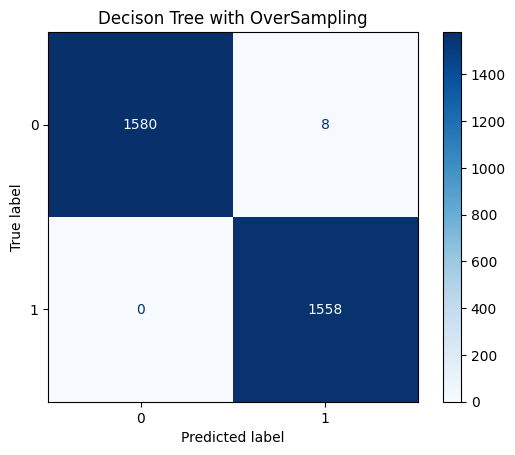

Accuracy:  0.9974570883661793


In [58]:
clf = DecisionTreeClassifier()
clf.fit(X_train_ros, y_train_ros)

predictions = clf.predict(X_test_ros)

cm = confusion_matrix(y_test_ros, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Decison Tree with OverSampling")
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, predictions))

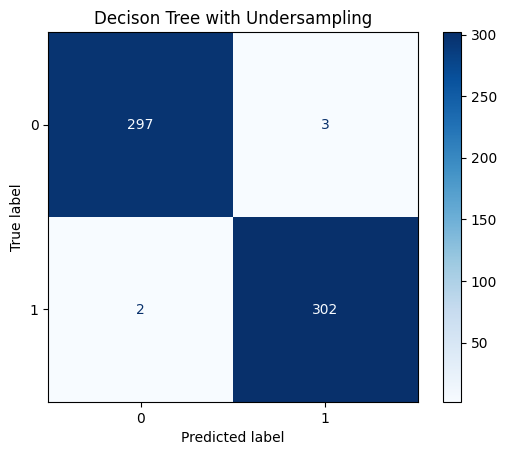

Accuracy:  0.9917218543046358


In [65]:
clf = DecisionTreeClassifier()
clf.fit(X_train_rus, y_train_rus)

predictions = clf.predict(X_test_rus)

cm = confusion_matrix(y_test_rus, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Decison Tree with Undersampling")
plt.show()


print("Accuracy: ", accuracy_score(y_test_rus, predictions))

As we can observe, there seems to be no effect at all in using either Oversampling or Undersampling, that is, to this model.
(Observation: Undersampling seems slightly better in some scenarios, but worse in other scenarios, but it is irrelevant). Based on that, for the following code blocks about Decision Trees, we are going to use the Oversampling.

Even though the Decision Tree already has a accuracy of 0.99, we can try to improve it by changing the hyperparameters, like the max depth of the tree. For that, we can use the GridSearchCV, that will try all the possible combinations of the hyperparameters and return the best one.

In [66]:
#Tuning the model
from collections import Counter
from sklearn.exceptions import FitFailedWarning
import warnings
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}



# Initializing a Counter to keep track of the best parameters
best_params_counter = Counter()

# Number of times to run the grid search
n_runs = 10

for _ in range(n_runs):
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_ros, y_train_ros)
    best_params = grid_search.best_params_
    best_params_counter[str(best_params)] += 1

# Print the most common best parameters
print(best_params_counter.most_common(1))

[("{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}", 1)]


Although the parameters ``min_samples_leaf`` and ```min_samples_split`` are always consistent everytime the above block is executed, the ``max_depth`` and ``max_features`` changes between the values (15,20) and (log2,sqrt). We noticed that the (max_depth=15,max_features=log2) was the most common, and therefore, better overall.
After obtaining the hyperparameters, we can train the model again, but now with the best hyperparameters.

Best Accuracy:  0.9990464081373173


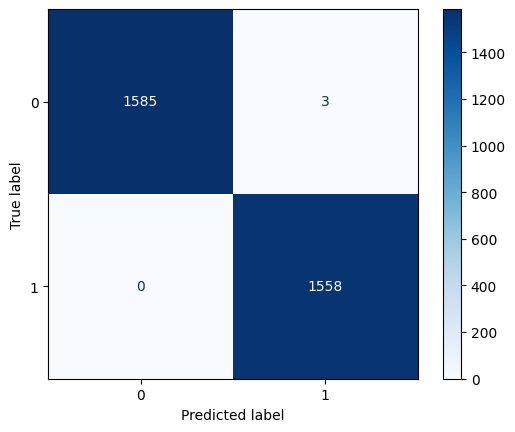

Accuracy:  0.9990464081373173


In [75]:
best_accuracy = 0
best_model = None
best_predictions = None

for _ in range(100):

    clf = DecisionTreeClassifier(max_depth=15,max_features='log2', min_samples_leaf=1, min_samples_split=2)
    clf.fit(X_train_ros, y_train_ros)

    predictions = clf.predict(X_test_ros)
    accuracy = accuracy_score(y_test_ros, predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf
        best_predictions = predictions

# Print the best accuracy
print("Best Accuracy: ", best_accuracy)

# Plot the confusion matrix for the best model
cm = confusion_matrix(y_test_ros, best_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, best_predictions))

After the application of the calculated hyperparameters, we can see that the accuracy of the model has increased.

Other alternative is using the Random Forest, that is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

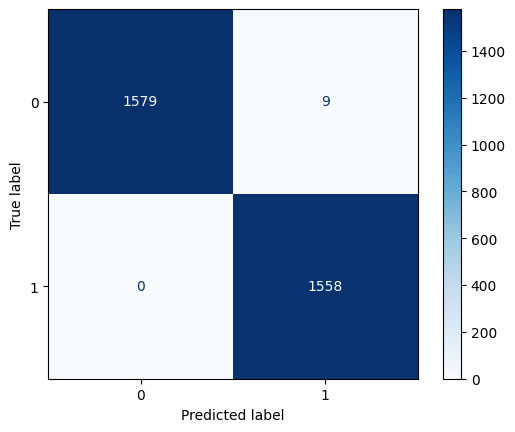

Accuracy:  0.9971392244119517


In [80]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, max_depth=15, random_state=42)

# Train the classifier
clf.fit(X_train_ros, y_train_ros)

# Make predictions on the test set
predictions = clf.predict(X_test_ros)

cm = confusion_matrix(y_test_ros, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, predictions))

We can observe that the results are slightly better than the Decision Tree Classifier, without hyperparameter tuning. 

## Neural Networks

Neural Networks are a category of models within the general machine learning literature that are inspired by biological neural networks. These models are designed to simulate the behavior of biological systems composed of "neurons". A Neural Network takes in inputs, which are then processed in hidden layers using weights that are adjusted during training. Then the model spits out a prediction as output.

They are comprised of the following components:
- An input layer, which receives input from our dataset. Each node in this layer represents an attribute in our dataset.
- One or more hidden layers, each of which consists of neurons where computations are done.
- An output layer, which produces the result for given inputs.

In this model, it is necessary to use the normalized data, given that the Neural Networks are sensitive to the scale of the data. That data was normalized using the RobustScaler above.

For the first block of code, we are going to use the oversampling and then the undersampling after to see which one is better in this model.

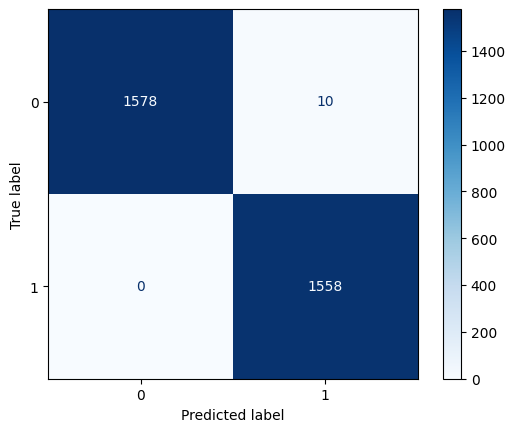

Accuracy:  0.9968213604577241


In [129]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier
clf = MLPClassifier()

# Train the classifier with the RandomOverSampling data
clf.fit(X_train_ros_normalized, y_train_ros)

# Make predictions on the test set
predictions = clf.predict(X_test_ros_normalized)


# Compute the confusion matrix
cm = confusion_matrix(y_test_ros, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, predictions))

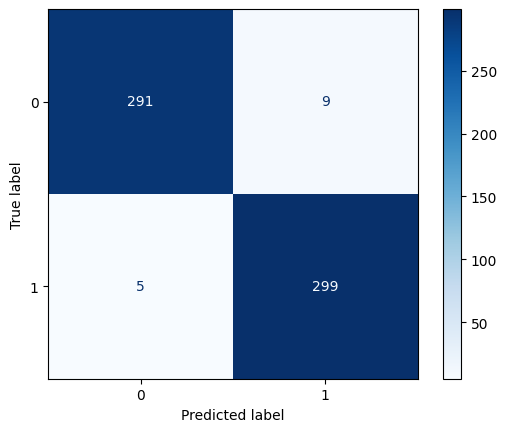

Accuracy:  0.9768211920529801


In [97]:

# Create an MLPClassifier
clf = MLPClassifier()

# Train the classifier with the RandomUnderSampling data
clf.fit(X_train_rus_normalized, y_train_rus)

# Make predictions on the test set
predictions = clf.predict(X_test_rus_normalized)


# Compute the confusion matrix
cm = confusion_matrix(y_test_rus, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_rus, predictions))

After analyzing the results, we can see that the oversampling is better than the undersampling, given that the accuracy is higher. For that reason, we are going to use the oversampling for the following code blocks related to Neural Networks.

We can observe that the accuracy of the Neural Network is pretty high.

That said there are still some things, that we can try to improve the model, like changing the number of hidden layers, the number of neurons in each layer, the activation function, the optimizer, the loss function, the number of epochs, the batch size, etc...

Best parameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


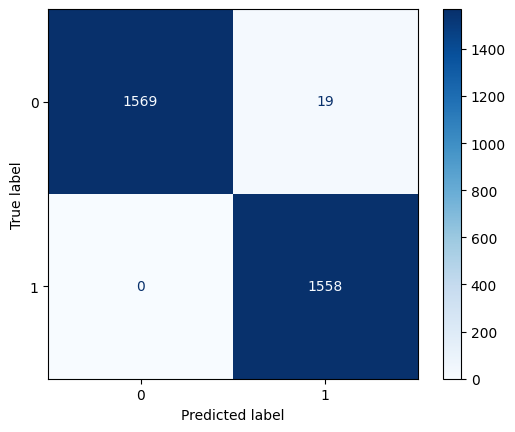

Accuracy:  0.9939605848696758


In [99]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,100), (150,150)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create a MLPClassifier
clf = MLPClassifier(early_stopping=True, random_state=42)

# Create a GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train_ros_normalized, y_train_ros)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Make predictions on the test set using the best model
best_clf = grid_search.best_estimator_
predictions = best_clf.predict(X_test_ros_normalized)

# Compute the confusion matrix
cm = confusion_matrix(y_test_ros, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, predictions))

It seems that the default values of the hyperparameters are the best ones, given that their accuracy is higher compared to the estimated best hyperparameters.

## K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a machine learning algorithm used for classification and regression. It works by calculating the distance between data points and assigning a new data point to the class that is most common among its 'K' most similar instances.

Like the previous models, we are going to use the oversampling and then the undersampling after to see which one is better in this model.

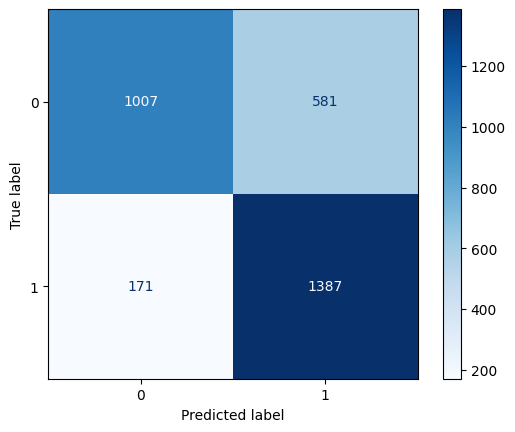

Accuracy:  0.7609663064208518


In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create a KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier with the RandomOverSampling data
clf.fit(X_train_ros, y_train_ros)

# Make predictions on the test set
predictions = clf.predict(X_test_ros)

# Compute the confusion matrix
cm = confusion_matrix(y_test_ros, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, predictions))

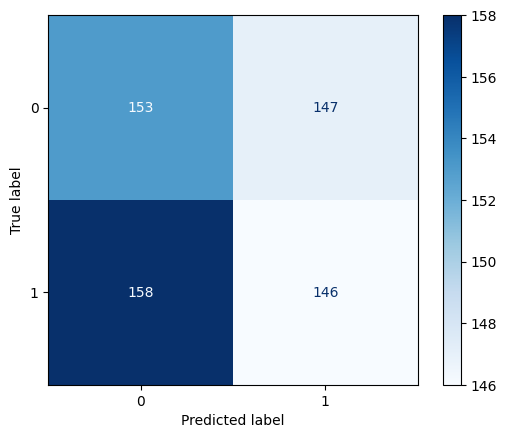

Accuracy:  0.49503311258278143


In [102]:
# Create a KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier with the RandomUnderSampling data
clf.fit(X_train_rus, y_train_rus)

# Make predictions on the test set
predictions = clf.predict(X_test_rus)

# Compute the confusion matrix
cm = confusion_matrix(y_test_rus, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_rus, predictions))

As we can see, it's better to use the oversampling, given that the accuracy is higher.

Regarding improvements in the K-Nearest Neighbors model, we can try to change some of its hyperparameters, like the number of neighbors, the distance metric, the weights, etc...

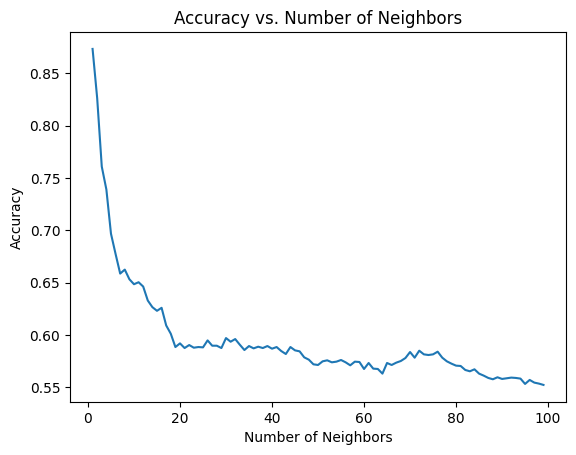

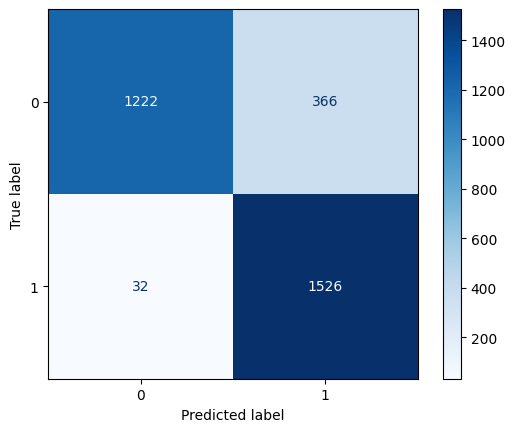

Accuracy:  0.8734901462174189
Best number of neighbors:  1


In [103]:
#Finding the best number of neighbors
best_accuracy = 0
best_model = None
best_predictions = None
best_n_neighbors = 0

accuracy_list = []

for n_neighborss in range(1, 100):
    
        clf = KNeighborsClassifier(n_neighbors=n_neighborss)
        clf.fit(X_train_ros, y_train_ros)
    
        predictions = clf.predict(X_test_ros)
        accuracy = accuracy_score(y_test_ros, predictions)

        accuracy_list.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = clf
            best_predictions = predictions
            best_n_neighbors = n_neighborss

# Plot accuracy for each number of neighbors
plt.plot(range(1, 100), accuracy_list)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test_ros, best_predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, best_predictions))
print("Best number of neighbors: ", best_n_neighbors)

We can try the same thing, but using the normalized data, given that the K-Nearest Neighbors is sensitive to the scale of the data.

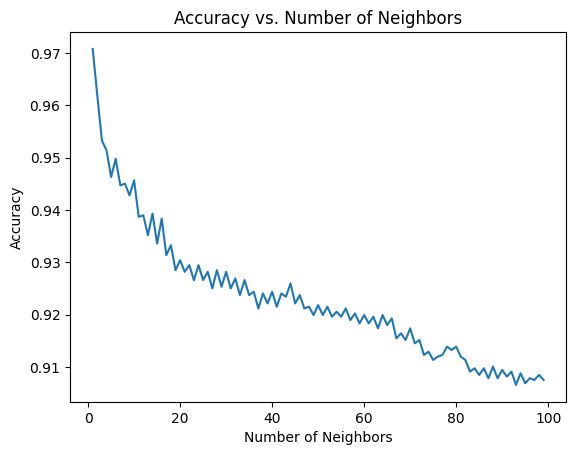

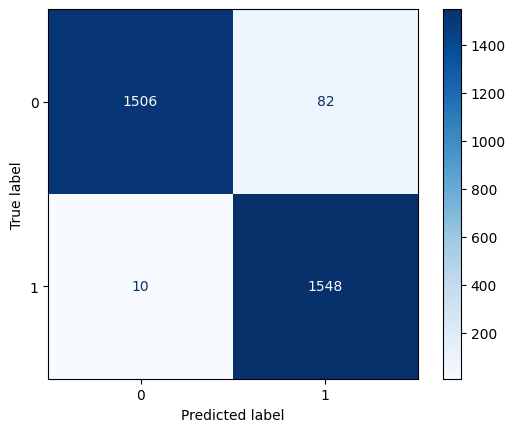

Accuracy:  0.9707565162110616
Best number of neighbors:  1


In [104]:
#Finding the best number of neighbors
best_accuracy = 0
best_model = None
best_predictions = None
best_n_neighbors = 0

accuracy_list = []

for n_neighborss in range(1, 100):
    
        clf = KNeighborsClassifier(n_neighbors=n_neighborss)
        clf.fit(X_train_ros_normalized, y_train_ros)
    
        predictions = clf.predict(X_test_ros_normalized)
        accuracy = accuracy_score(y_test_ros, predictions)

        accuracy_list.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = clf
            best_predictions = predictions
            best_n_neighbors = n_neighborss

# Plot accuracy for each number of neighbors
plt.plot(range(1, 100), accuracy_list)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test_ros, best_predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, best_predictions))
print("Best number of neighbors: ", best_n_neighbors)

## SVM


Support Vector Machines (SVM) is a supervised machine learning algorithm that can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

## Naive Bayes

Naive Bayes is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

Finally, like the previous models, we are going to use the oversampling and then the undersampling after to see which one is better in this model.

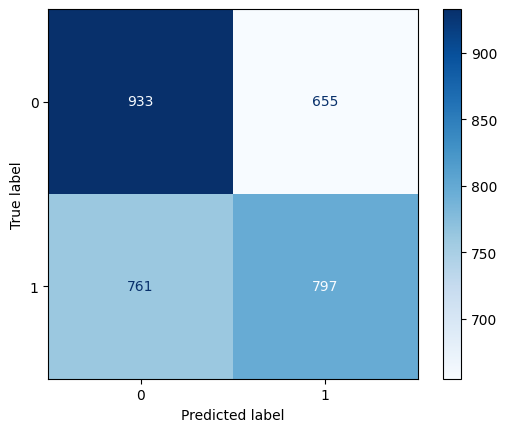

Accuracy:  0.5499046408137317


In [105]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier with RandomOverSampling data
clf.fit(X_train_ros, y_train_ros)

# Make predictions on the test set
predictions = clf.predict(X_test_ros)

# Compute the confusion matrix
cm = confusion_matrix(y_test_ros, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, predictions))


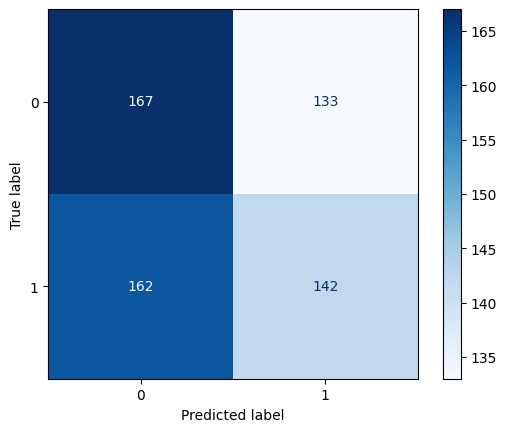

Accuracy:  0.5115894039735099


In [106]:
# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier with RandomUnderSampling data
clf.fit(X_train_rus, y_train_rus)

# Make predictions on the test set
predictions = clf.predict(X_test_rus)

# Compute the confusion matrix
cm = confusion_matrix(y_test_rus, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_rus, predictions))

After analyzing the results, we can see that the oversampling is better than the undersampling, given that the accuracy is higher. For that reason, we are going to use the oversampling for the following code blocks related to Naive Bayes.
If we use the normalized data:

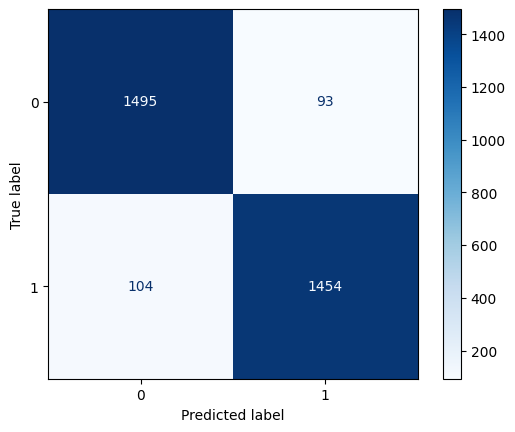

Accuracy:  0.9373808010171647


In [126]:
# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train_ros_normalized, y_train_ros)

# Make predictions on the test set
predictions = clf.predict(X_test_ros_normalized)

# Compute the confusion matrix
cm = confusion_matrix(y_test_ros, predictions)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Accuracy: ", accuracy_score(y_test_ros, predictions))

## Extra Models

We can try other models, such as:
- XGBoost
- AdaBoost
- Bagging
- Gradient Boosting
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- CatBoost


XGBoost: 0.9987279139227752 accuracy
AdaBoost: 0.9985160495159955 accuracy
Bagging: 0.9983041851092158 accuracy
Gradient Boosting: 0.9985160495159955 accuracy
Linear Discriminant Analysis: 0.9139448162942172 accuracy
Quadratic Discriminant Analysis: 0.9476501493396666 accuracy
CatBoost: 0.9985160495159955 accuracy


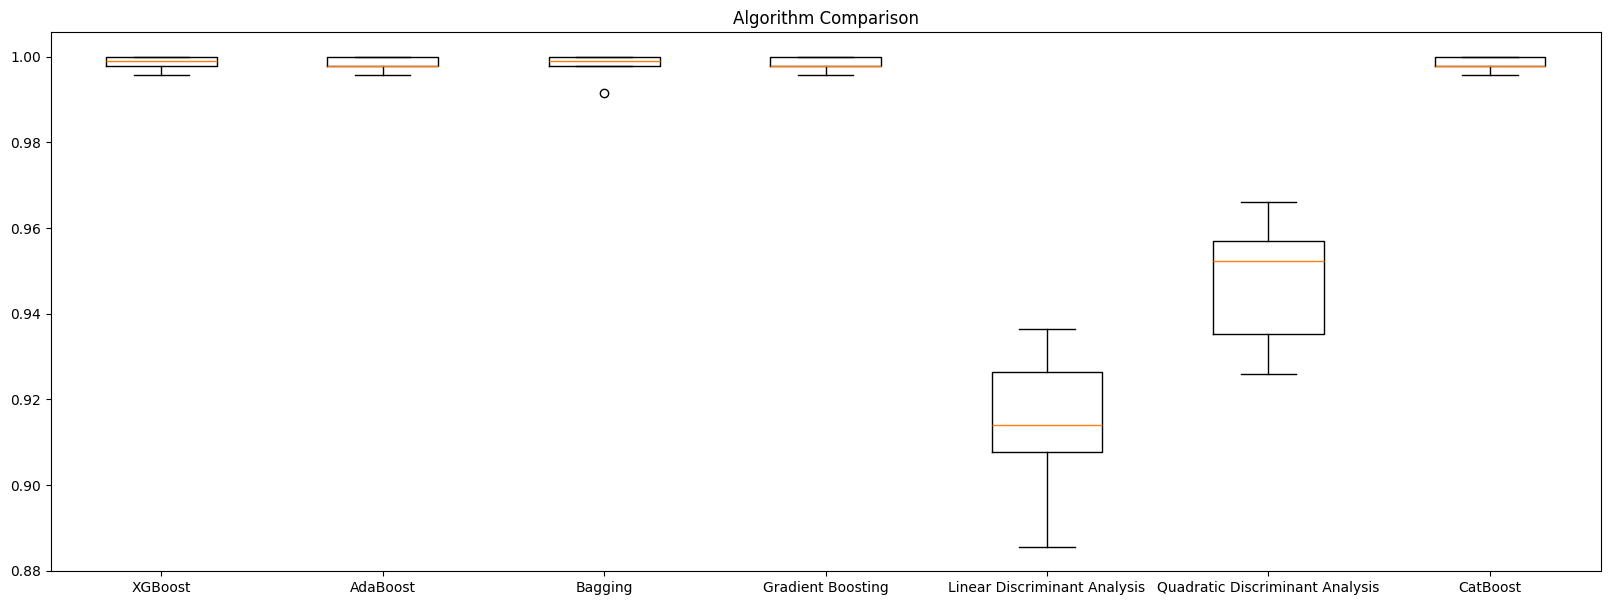

In [128]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = [
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier(algorithm='SAMME')),
    ('Bagging', BaggingClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    ('CatBoost', CatBoostClassifier(logging_level='Silent'))
]

kfold = KFold(n_splits=10, random_state=1, shuffle=True)

results = []

for name, model in models:
    cv_results = cross_val_score(model, X_train_ros_normalized, y_train_ros, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    print(f"{name}: {cv_results.mean()} accuracy")


plt.figure(figsize=(20, 7))
plt.boxplot(results, labels=[name for name, _ in models])
plt.title('Algorithm Comparison')

plt.show()


# Conclusions




- decision tree over: 0.9974570883661793
- decision tree under: 0.9917218543046358
- decision tree perfect : 0.9990464081373173
- decision tree with random forest : 0.9971392244119517
- neural networks oversampling normalized: 0.9968213604577241
- neural networks undersampling normalized: 0.9768211920529801
- neural networks perfect over: 0.9939605848696758
- k-nearest neighbors over: 0.7609663064208518
- k-nearest neighbors under: 0.49503311258278143
- k-nearest good n-neigbors over: 0.8734901462174189
- k-nearest good n-neighbors normalized: 0.9707565162110616
- naive-bayes over: 0.5499046408137317
- naive-bayes under: 0.5115894039735099
- naive-bayes over normalized: 0.9373808010171647
- XGBoost: 0.9987279139227752 
- AdaBoost: 0.9985160495159955 
- Bagging: 0.9983041851092158 
- Gradient Boosting: 0.9985160495159955
- Linear Discriminant Analysis: 0.9139448162942172
- Quadratic Discriminant Analysis: 0.9476501493396666
- CatBoost: 0.9985160495159955

# References

- https://www.kaggle.com/code/sabunbalt/asteroid-classification
- https://www.kaggle.com/code/ayushparwal2026/nasa-asteroids-dt-rf-classifications
- https://www.kaggle.com/code/mohammadfa/asteroids-xgboost
- https://www.kaggle.com/code/mustafacakir/asteroid-classification
- https://github.com/Fabio-A-Sa/Y3S2-InteligenciaArtificial/blob/main/Project%202/src/cancer_prediction.ipynb